In [1]:
pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

Processing ./mlrose
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose_hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=132379 sha256=1829ffcf6a56777d57653d0f8115892b28afd8270f549a4064757cb56f9ada45
  Stored in directory: /private/var/folders/c6/5zg6wy5n121f2pzclkwbzplm0000gn/T/pip-ephem-wheel-cache-z412ql56/wheels/77/c5/de/7a63a2c78a12ad335a5091a9209439e12d86616744464a5ae4
Successfully built mlrose_hiive
  Attempting uninstall: mlrose_hiive
    Found existing installation: mlrose_hiive 2.2.4
    Uninstalling mlrose_hiive-2.2.4:
      Successfully uninstalled mlrose_hiive-2.2.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
"""
#A. flip every two
def border_swap(next_gen, child, dic_values):
    if len(next_gen) == 0:
        next_gen.append(child)
    else:
        dic_above = dic_values['above_avg']
        dic_below = dic_values['below_avg']
        new_start = child[0]
        last_start = next_gen[-1][0]
        if ((new_start in dic_below) & (last_start not in dic_below)) or \
                ((new_start in dic_above) & (last_start not in dic_above)):
            next_gen.append(child)
        else:
            child_flip = []
            for i in range(0, len(child), 2):
                j = i + 1
                if j < len(child):
                    #print(child_flip)
                    #print(child[j])
                    #print(child[i])
                    child_flip.extend([child[j], child[i]])
            child_flip = np.array(child_flip[:len(child)])
            #first = child[len(child)//2:]
            #second = child[:len(child)//2]
            #child_flip = np.concatenate([first, second])
            #child_flip = len(child) - 1 - child
            #print("border trades start")
            #print("next gen is", next_gen)
            #print("child is", child)
            #print("second half of child is", child[len(child)//2:])
            #print("first half of child is", child[:len(child)//2])
            #print("child_flip is", child_flip)
            next_gen.append(child_flip)
    return next_gen
"""

'\n#A. flip every two\ndef border_swap(next_gen, child, dic_values):\n    if len(next_gen) == 0:\n        next_gen.append(child)\n    else:\n        dic_above = dic_values[\'above_avg\']\n        dic_below = dic_values[\'below_avg\']\n        new_start = child[0]\n        last_start = next_gen[-1][0]\n        if ((new_start in dic_below) & (last_start not in dic_below)) or                 ((new_start in dic_above) & (last_start not in dic_above)):\n            next_gen.append(child)\n        else:\n            child_flip = []\n            for i in range(0, len(child), 2):\n                j = i + 1\n                if j < len(child):\n                    #print(child_flip)\n                    #print(child[j])\n                    #print(child[i])\n                    child_flip.extend([child[j], child[i]])\n            child_flip = np.array(child_flip[:len(child)])\n            #first = child[len(child)//2:]\n            #second = child[:len(child)//2]\n            #child_flip = np.co

In [3]:
import mlrose_hiive as mh

In [4]:
#help(mh.runners)

In [5]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [6]:
import pandas as pd
import utility as u
import importlib

In [7]:
class Task:
    def __init__(self, task_id, duration, deadline, profit):
        self.task_id = task_id
        self.duration = duration
        self.deadline = deadline
        self.profit = profit

In [8]:
size = 108
importlib.reload(u)
tasks = u.generate_random_tasks(size, 5, 80, 25)

In [9]:
"""
with open("108_tasks.txt", "a") as f:
    for t in tasks:
        print(t.task_id, t.duration, t.deadline, t.profit, file=f)
"""

'\nwith open("108_tasks.txt", "a") as f:\n    for t in tasks:\n        print(t.task_id, t.duration, t.deadline, t.profit, file=f)\n'

In [10]:
# # Job Scheduling
problem_ffp = mh.JobSchedulingGenerator().generate(seed=0, size=size, tasks=tasks, break_time=1, work_limit=2)
#state = problem_ffp.get_state()

In [11]:
problem_ffp.length

108

In [12]:
problem_ffp.fitness

245.0

In [13]:
# GA runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GAJSRunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[40, 50, 60],
              mutation_rates=[0.07, 0.08]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [14]:
df_run_curves_ffp.shape

(12294, 7)

In [15]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.012664,274.0,0.0,40,0.07,2048
1,1,0.042710,377.0,2.0,40,0.07,2048
2,2,0.058168,377.0,3.0,40,0.07,2048
3,3,0.075535,390.0,5.0,40,0.07,2048
4,4,0.084014,390.0,6.0,40,0.07,2048


In [16]:
df_run_curves_ffp['Fitness'].max()

917.0

In [17]:
df_run_curves_ffp[df_run_curves_ffp.Fitness == df_run_curves_ffp['Fitness'].max()]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
12253,2008,20.022997,917.0,2113.0,60,0.08,2048
12254,2009,20.033487,917.0,2114.0,60,0.08,2048
12255,2010,20.047244,917.0,2115.0,60,0.08,2048
12256,2011,20.054971,917.0,2116.0,60,0.08,2048
12257,2012,20.064300,917.0,2117.0,60,0.08,2048
12258,2013,20.071881,917.0,2118.0,60,0.08,2048
12259,2014,20.080491,917.0,2119.0,60,0.08,2048
12260,2015,20.087378,917.0,2120.0,60,0.08,2048
12261,2016,20.100205,917.0,2121.0,60,0.08,2048
12262,2017,20.107200,917.0,2122.0,60,0.08,2048


In [18]:
# need to check Time and FEvals

In [19]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [20]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
12253,2008,20.022997,917.0,2113.0,60,0.08,2048
12254,2009,20.033487,917.0,2114.0,60,0.08,2048
12255,2010,20.047244,917.0,2115.0,60,0.08,2048
12256,2011,20.054971,917.0,2116.0,60,0.08,2048
12257,2012,20.064300,917.0,2117.0,60,0.08,2048
12258,2013,20.071881,917.0,2118.0,60,0.08,2048
12259,2014,20.080491,917.0,2119.0,60,0.08,2048
12260,2015,20.087378,917.0,2120.0,60,0.08,2048
12261,2016,20.100205,917.0,2121.0,60,0.08,2048
12262,2017,20.107200,917.0,2122.0,60,0.08,2048


In [21]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,60,0.08,2113.0,2028.0,20.022997


In [22]:
# tentatively, pick pop size = 40 and mutation_rate = 0.08, as the only choice

In [23]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.012664,274.0,0.0,40,0.07,2048
1,1,0.042710,377.0,2.0,40,0.07,2048
2,2,0.058168,377.0,3.0,40,0.07,2048
3,3,0.075535,390.0,5.0,40,0.07,2048
4,4,0.084014,390.0,6.0,40,0.07,2048


In [24]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [25]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GAJSRunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[40], # 20 bits in total
              mutation_rates=[0.08])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [26]:
df_iter_curves_ffp.shape

(20490, 7)

In [27]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.009667,274.0,0.0,60,0.08,2048
1,1,0.029193,392.0,2.0,60,0.08,2048
2,2,0.043330,392.0,3.0,60,0.08,2048
3,3,0.061398,413.0,5.0,60,0.08,2048
4,4,0.072052,434.0,7.0,60,0.08,2048


In [28]:
df_iter_curves_ffp.Fitness.max()

926.0

In [29]:
#df_iter_curves_ffp.to_csv('gab_mutate_A_js_108.csv')
import pandas as pd
df_iter_curves_ffp = pd.read_csv('../../csv-files/gab_mutate_A_js_108.csv')

In [30]:
df_iter_curves_ffp.Iteration.max()

2048

In [31]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [32]:
df_fitness_iter_ffp.shape

(2049, 3)

In [33]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,316.3,1212.011111
1,1,392.3,65.566667
2,2,395.5,114.055556
3,3,404.6,160.711111
4,4,413.2,201.066667


In [34]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

1864    1864
1865    1865
1866    1866
1867    1867
1868    1868
        ... 
2044    2044
2045    2045
2046    2046
2047    2047
2048    2048
Name: Iteration, Length: 185, dtype: int64

In [35]:
# converge point-never converged
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

nan

In [36]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [37]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,316.3,1212.011111,34.813950
1,1,392.3,65.566667,8.097325
2,2,395.5,114.055556,10.679680
3,3,404.6,160.711111,12.677189
4,4,413.2,201.066667,14.179798


Text(0, 0.5, 'Fitness')

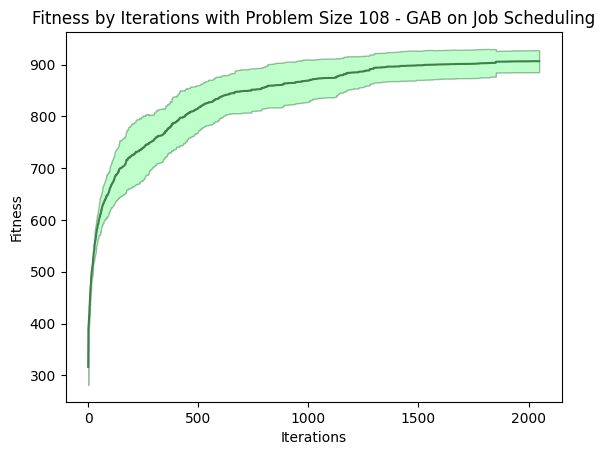

In [38]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#3F7F4C')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title(f'Fitness by Iterations with Problem Size {size} - GAB on Job Scheduling')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [39]:
# elbow analysis
from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, S=1.0, curve="concave", direction="increasing")

print(kneedle.knee)

85


In [40]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration'] == kneedle.knee]

,Iteration,avg_fitness,var_fitness,stddev_fitness
85,85,647.8,1683.288889,41.027904


In [41]:
df_fitness_iter_ffp.avg_fitness.max()

906.7

In [42]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()

63.87313815507879

In [43]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp.stddev_fitness.max()].Iteration,

(232    232
 Name: Iteration, dtype: int64,)

In [44]:
# Fevals - iteration

In [45]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [46]:
df_FEvals_iter_ffp.avg_FEvals.max()

2142.6

In [47]:
df_FEvals_iter_ffp.shape

(2049, 3)

In [48]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,1.9,0.100000
2,2,3.3,0.455556
3,3,4.8,0.400000
4,4,6.5,0.277778


In [49]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [50]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 9.87983355685262)

In [51]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,1.9,0.100000,0.316228
2,2,3.3,0.455556,0.674949
3,3,4.8,0.400000,0.632456
4,4,6.5,0.277778,0.527046


Text(0, 0.5, 'FEvals')

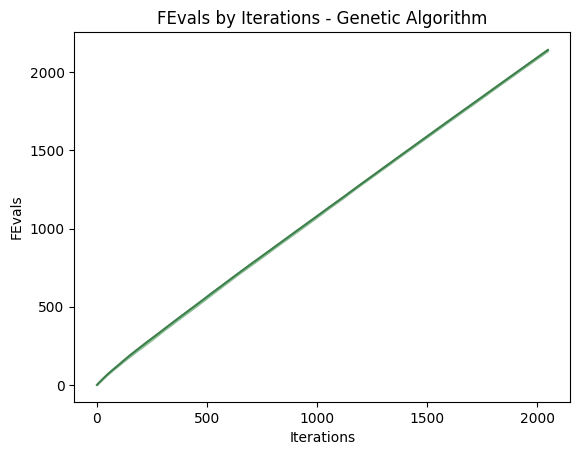

In [52]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#3F7F4C')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('FEvals by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [53]:
# fitness - wall clock time

In [54]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [55]:
df_time_iter_ffp.shape

(2049, 3)

In [56]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.003477,0.000005
1,1,0.015938,0.000026
2,2,0.026971,0.000036
3,3,0.039014,0.000065
4,4,0.048060,0.000075


In [57]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [58]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.003477,0.000005,0.002280
1,1,0.015938,0.000026,0.005075
2,2,0.026971,0.000036,0.006023
3,3,0.039014,0.000065,0.008046
4,4,0.048060,0.000075,0.008666


Text(0, 0.5, 'Time')

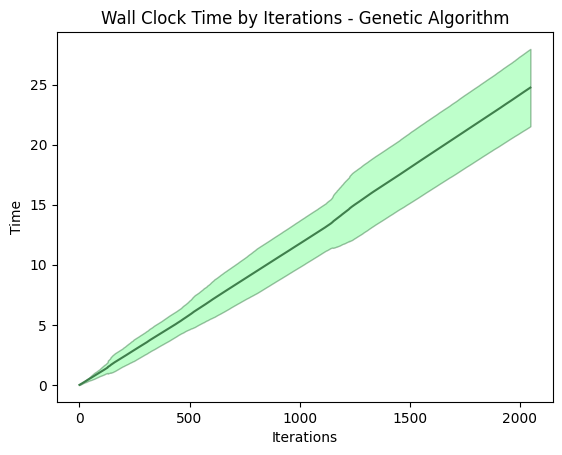

In [59]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#3F7F4C')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Wall Clock Time by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [60]:
df_time_iter_ffp.stddev_time.max()

3.2178812833241244

In [61]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time == df_time_iter_ffp.stddev_time.max()].Iteration

2048    2048
Name: Iteration, dtype: int64

In [62]:
df_time_iter_ffp.avg_time.max()

24.7449050652016